# CloudGenerator usage example

import matplotlib to plot result, cv2 to change default colorspace

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from cloud_generator import CloudGen

## Create a CloudGen object with size of image = 500x500 px

In [2]:
clgen = CloudGen(size = 500)

let's generate an image

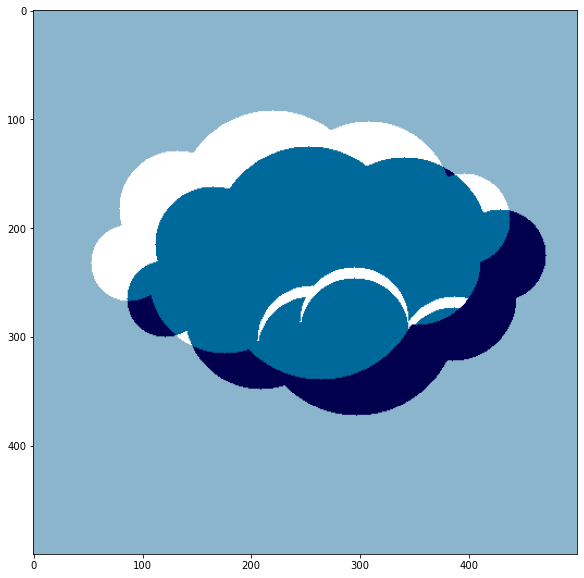

In [3]:
img = clgen.gen_cloud()

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Experiment with x_axis_coeff and y_axis_coeff

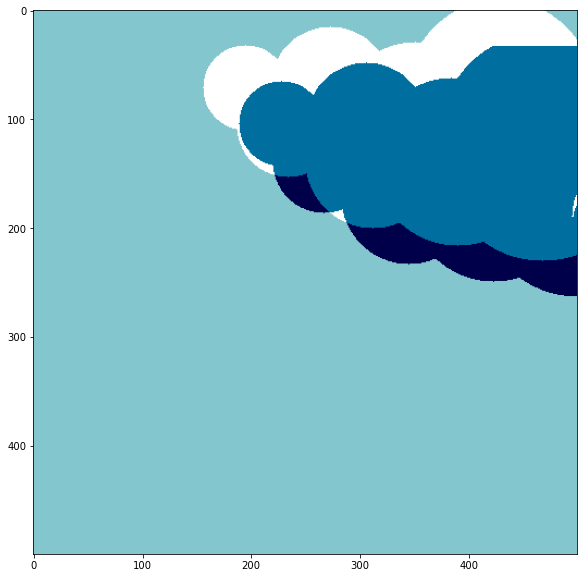

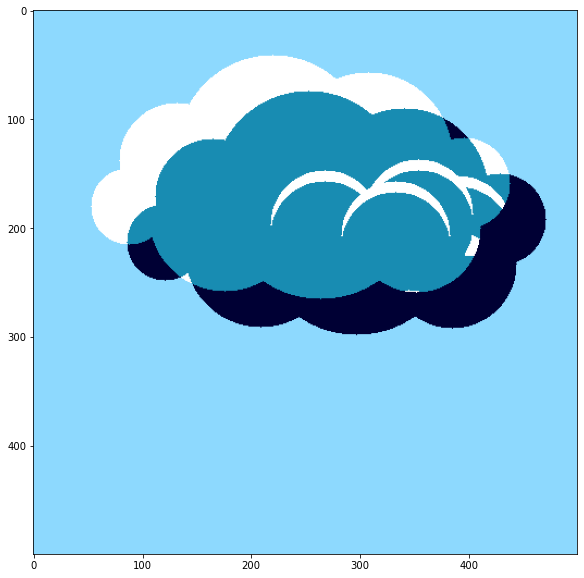

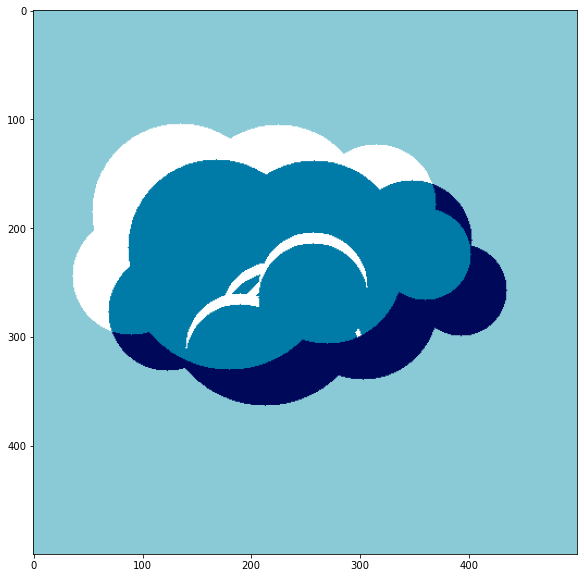

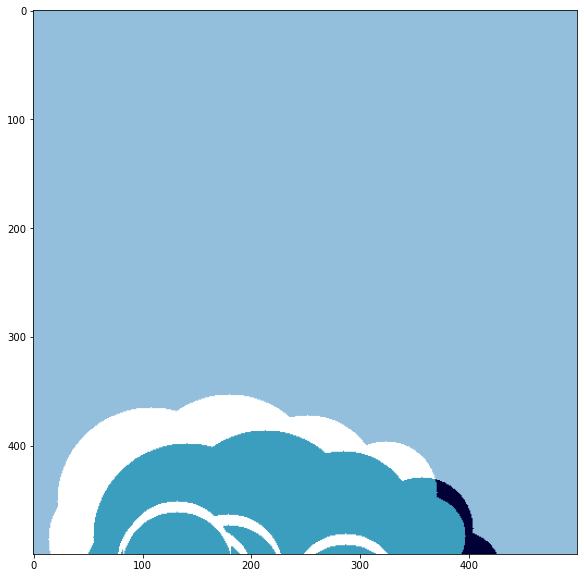

In [4]:
for i in np.arange(1, 5, 1):
    clgen = CloudGen(size = 500, x_axis_coeff=i, y_axis_coeff=5 - i)
    img = clgen.gen_cloud()

    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Make custom colormap

In [5]:
def split_colors(color_count, color_from, color_to):
    """
    Split colors for gradient filling depends on color count
    Parameters
    ---------
    color_count: int, required
        Color count, for example in row or some area

    color_from: list or tuple, required
        First color of gradient filling

    color_to: list or tuple, required
        Second color of gradient filling

    Returns
    ----------
    list:
        list of colors for gradient filling
    """
    colors = []
    for c in range(3):#RGB
        step = np.abs(color_from[c] - color_to[c])/color_count
        if step:
            if color_from[c]>color_to[c]:
                color = np.arange(color_from[c],color_to[c],-step)
            else:
                color = np.arange(color_from[c],color_to[c],step)
        else:
            color = [color_from[c] for i in np.arange(color_count)]


        colors.append(color)
    colors = [(int(a),int(b),int(c)) for a,b,c in zip(colors[0],colors[1],colors[2])]
    return colors

In [6]:
# Crimson color - RGB
start_color = (220, 20, 60)

# Dark Orange - RGB
end_color = (255, 140, 0)

color_count = 256

In [7]:
grad_arr = np.array(split_colors(color_count, start_color, end_color), np.uint8)

In [8]:
cmap = grad_arr.reshape(256, 1, 3)

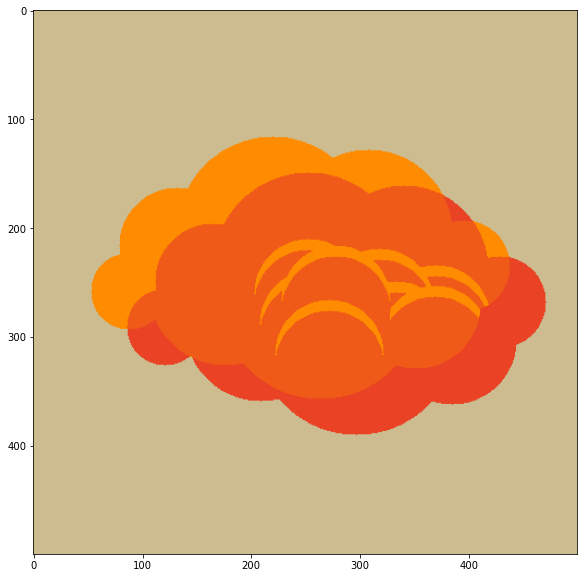

In [9]:
clgen = CloudGen(size = 500, cmap=cmap)
img = clgen.gen_cloud()

plt.figure(figsize=(10,10))
plt.imshow(img)